In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
filename_ts = r'./data.csv'
df=pd.read_csv(filename_ts,encoding='gbk')
print(df.columns)
df.head(5)

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


0    3561
1    1193
Name: status, dtype: int64


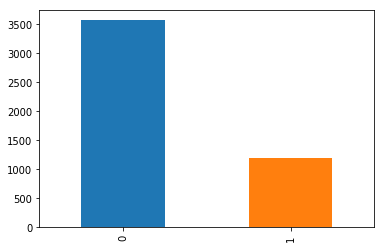

In [3]:
#查看标签列 status的分布均衡性(处理前)
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar')

In [5]:
#student_feature缺失太多直接丢弃,其他没有业务价值
drop_columns=['bank_card_no','source','id_name','custid','student_feature','trade_no']
df.drop(drop_columns,axis=1,inplace=True)

#日期处理为日期格式datetime，并生成新的一列 loans_time
df['latest_query_time']=pd.to_datetime(df['latest_query_time'])
df['loans_latest_time']=pd.to_datetime(df['loans_latest_time'])

#将timedelta格式转化为float类型(秒)
df['loans_time']=df['loans_latest_time']-df['latest_query_time']
df['loans_time']=df['loans_time'].dt.total_seconds().dropna()

#两列日期格式数据处理直接丢弃
datatime_data=['loans_latest_time','latest_query_time']
df.drop(datatime_data,axis=1,inplace=True)

#将城市进行数值化
map_dict={'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他':0}
df['reg_preference_for_trad']=df['reg_preference_for_trad'].map(map_dict)
df.head()

,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,5,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,10,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,12,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,13,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,14,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [6]:
#统计缺失值
print('缺失值:','\n',df.isnull().sum())

缺失值: 
 Unnamed: 0                                 0
low_volume_percent                         2
middle_volume_percent                      2
take_amount_in_later_12_month_highest      0
trans_amount_increase_rate_lately          3
trans_activity_month                       2
trans_activity_day                         2
transd_mcc                                 2
trans_days_interval_filter                 8
trans_days_interval                        2
regional_mobility                          2
repayment_capability                       0
is_high_user                               0
number_of_trans_from_2011                  2
first_transaction_time                     2
historical_trans_amount                    0
historical_trans_day                       2
rank_trad_1_month                          2
trans_amount_3_month                       0
avg_consume_less_12_valid_month            2
abs                                        0
top_trans_count_last_1_month               2
avg

In [7]:
#动作1：数量较小，直接丢弃
# df.dropna(inplace=True)

#动作2：缺失值以中位值进行填充
from sklearn.preprocessing import Imputer
columns=list(df)
imp=Imputer(missing_values=np.nan,strategy='median')
df=imp.fit_transform(df)
print('number after processing:',df.shape)
df=pd.DataFrame(df,columns=columns)

#再次统计缺失值
print('缺失值:','\n',(df.isnull().sum()))
df.head()

number after processing: (4754, 83)
缺失值: 
 Unnamed: 0                               0
low_volume_percent                       0
middle_volume_percent                    0
take_amount_in_later_12_month_highest    0
trans_amount_increase_rate_lately        0
trans_activity_month                     0
trans_activity_day                       0
transd_mcc                               0
trans_days_interval_filter               0
trans_days_interval                      0
regional_mobility                        0
repayment_capability                     0
is_high_user                             0
number_of_trans_from_2011                0
first_transaction_time                   0
historical_trans_amount                  0
historical_trans_day                     0
rank_trad_1_month                        0
trans_amount_3_month                     0
avg_consume_less_12_valid_month          0
abs                                      0
top_trans_count_last_1_month             0
avg_price_l

,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,5.0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,10.0,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,12.0,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,13.0,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,14.0,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [8]:
#丢掉方差为0即没有变化的列
df.drop(df.columns[df.std()==0],axis=1,inplace=True)
df.shape

(4754, 83)

0.0    3561
1.0    1193
Name: status, dtype: int64


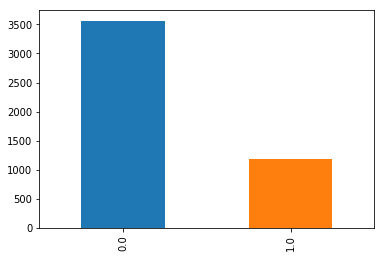

In [9]:
#查看标签列 status的分布均衡性(处理后)
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar')

In [10]:
train_x=df.drop(['status'],axis=1)
train_y=df['status']

print(train_x.shape)
train_x.head()

(4754, 82)


,Unnamed: 0,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,5.0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,10.0,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,12.0,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,13.0,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,14.0,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [11]:
#拆分测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=2018)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)


(3327, 82)
(1427, 82)
(1427,)


In [19]:
#引入模型进行训练
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [13]:
# 此时选择将x_train进行标准化
from sklearn.preprocessing import StandardScaler
columns=list(x_train)
x_train=StandardScaler().fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=columns)

x_test=StandardScaler().fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=columns)

In [22]:
#定义返回y_pred和y_pred_proba的函数，并能打印训练集和测试集的精度以及ROC曲线面积
def model_metrics(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
   #auc取值：用roc_auc_score或auc
    print('[AUC值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    #召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # F-1值
    print('[F-1 Score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    #精确值
    
    print('[精确率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))
    #加上return方便后续计算混淆矩阵效果
    return y_test_proba,y_test_pred

**调入随机森林模型，无调参之前看下分数**

In [37]:

rf=RandomForestClassifier()

rf_model = model_metrics(rf,x_train,x_test,y_train,y_test)

[准确率] 训练集： 0.9805 测试集： 0.7680
[AUC值] 训练集： 0.9995 测试集： 0.7025
[召回率] 训练集： 0.9233 测试集： 0.2563
[F-1 Score] 训练集： 0.9595 测试集： 0.3573
[精确率] 训练集： 0.9987 测试集： 0.5897


**SVM**

In [38]:
from sklearn import svm
clf_svm = svm.SVC(probability=True)
SVM_model = model_metrics(clf_svm,x_train,x_test,y_train,y_test)

[准确率] 训练集： 0.8395 测试集： 0.7835
[AUC值] 训练集： 0.9170 测试集： 0.7511
[召回率] 训练集： 0.4005 测试集： 0.2396
[F-1 Score] 训练集： 0.5557 测试集： 0.3576
[精确率] 训练集： 0.9076 测试集： 0.7049


**决策树**

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier()
DT_model = model_metrics(clf_DT,x_train,x_test,y_train,y_test)

[准确率] 训练集： 1.0000 测试集： 0.6636
[AUC值] 训练集： 1.0000 测试集： 0.5839
[召回率] 训练集： 1.0000 测试集： 0.4234
[F-1 Score] 训练集： 1.0000 测试集： 0.3878
[精确率] 训练集： 1.0000 测试集： 0.3576


**逻辑回归**

In [40]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression()
Logic_model = model_metrics(clf_Log,x_train,x_test,y_train,y_test)

[准确率] 训练集： 0.8016 测试集： 0.7849
[AUC值] 训练集： 0.8190 测试集： 0.7560
[召回率] 训练集： 0.3705 测试集： 0.3426
[F-1 Score] 训练集： 0.4836 测试集： 0.4448
[精确率] 训练集： 0.6959 测试集： 0.6340


**XGBoost **

In [43]:
from xgboost.sklearn import XGBClassifier
clf_xgb =  XGBClassifier()
xgb_model = model_metrics(clf_xgb,x_train,x_test,y_train,y_test)

[准确率] 训练集： 0.8536 测试集： 0.7807
[AUC值] 训练集： 0.9187 测试集： 0.7671
[召回率] 训练集： 0.4916 测试集： 0.3008
[F-1 Score] 训练集： 0.6274 测试集： 0.4083
[精确率] 训练集： 0.8668 测试集： 0.6353


D:\Software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
